## Compare results between different "datasets" -- NAT vs. small CPN vs. big CPN

Questions:
* pupil-dependent...
    * decoding the same?
    * noise correlations the same?
    * first order changes?
* overall pupil variance?
* number of cells?
* mean firing rates?
* MUA / instability?

In [1]:
import sys; sys.path.append("/auto/users/hellerc/code/projects/nat_pupil_ms/")
from global_settings import CPN_SITES, HIGHR_SITES
import charlieTools.nat_sounds_ms.decoding as decoding
import charlieTools.nat_sounds_ms.preprocessing as cpreproc
from nems_lbhb.analysis.statistics import get_bootstrapped_sample, get_direct_prob
import load_results as ld
from path_settings import DPRIME_DIR, PY_FIGURES_DIR, PY_FIGURES_DIR2, CACHE_PATH, REGRESSION

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2021-11-21 035241.log


In [2]:
# Define datasets
nat_data = HIGHR_SITES
cpns_data = [s for s in CPN_SITES if 'TNC' not in s]
cpnb_data = [s for s in CPN_SITES if 'TNC' in s]

In [3]:
# LOAD RAW DATA
rdata = {}
batches = [322]*len(nat_data) + [331]*len(CPN_SITES)
for site, batch in zip(nat_data+cpns_data+cpnb_data, batches):
    if site in ['BOL005c', 'BOL006b']:
        b = 294
    else:
        b = batch
    X, sp_bins, X_pup, pup_mask = decoding.load_site(site=site, batch=b)
    max_pupil = decoding.get_max_pupil(site[:7], rasterfs=4)
    rdata[site] = (X, sp_bins, X_pup, pup_mask, max_pupil)


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/294/BOL005c_045fa3fa2325c41a82e01440f3e3128b9e8f5088.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['BOL005c-04-1', 'BOL005c-06-1', 'BOL005c-07-1', 'BOL005c-09-1', 'BOL005c-09-2', 'BOL005c-10-1', 'BOL005c-12-2', 'BOL005c-13-1', 'BOL005c-13-2', 'BOL005c-18-1', 'BOL005c-19-2', 'BOL005c-22-1', 'BOL005c-24-1', 'BOL005c-25-1', 'BOL005c-25-2', 'BOL005c-25-3', 'BOL005c-27-1', 'BOL005c-29-1', 'BOL005c-32-1', 'BOL005c-33-1', 'BOL005c-34-1', 'BOL005c-37-1', 'BOL005c-37-2', 'BOL005c-43-1', 'BOL005c-44-1', 'BOL005c-44-2', 'BOL005c-46-1', 'BOL005c-47-1', 'BOL005c-48-1', 'BOL005c-48-4', 'BOL005c-49-1', 'BOL005c-49-2']
[numexpr.utils INFO] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[numexpr.utils INFO] NumExpr defaulting to 8 threads.
[root INFO] ['/auto/data/daq/Boleto/BOL005/BOL005c05_p_PPS_VOC.m', '/auto/data/daq/Bole

['BOL005c05_p_PPS_VOC.m', 'BOL005c09_p_PPS_VOC.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/294/BOL006b_bce875043fd2da16341a6ac51501a985b5ad967e.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['BOL006b-02-1', 'BOL006b-07-1', 'BOL006b-07-2', 'BOL006b-08-1', 'BOL006b-09-1', 'BOL006b-11-1', 'BOL006b-13-1', 'BOL006b-13-2', 'BOL006b-14-1', 'BOL006b-15-2', 'BOL006b-16-1', 'BOL006b-16-2', 'BOL006b-18-1', 'BOL006b-18-2', 'BOL006b-20-1', 'BOL006b-21-1', 'BOL006b-22-1', 'BOL006b-24-1', 'BOL006b-25-1', 'BOL006b-25-2', 'BOL006b-25-3', 'BOL006b-28-1', 'BOL006b-29-1', 'BOL006b-30-1', 'BOL006b-34-1', 'BOL006b-36-1', 'BOL006b-36-2', 'BOL006b-37-1', 'BOL006b-39-2', 'BOL006b-42-1', 'BOL006b-43-1', 'BOL006b-44-1', 'BOL006b-48-1', 'BOL006b-49-1', 'BOL006b-53-1', 'BOL006b-54-1', 'BOL006b-55-1', 'BOL006b-58-1', 'BOL006b-58-2', 'BOL006b-58-4', 'BOL006b-60-1', 'BOL006b-60-2', 'BOL006b-63-1', 'BOL006b-64-1']
[root INFO] ['/auto/data/daq/Boleto/BOL006/BOL006b09_p_PPS_VOC.m']


['BOL006b09_p_PPS_VOC.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TAR010c_bdab2fb24329ff3379f8cc5be72e4d16f64e14f7.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TAR010c-02-1', 'TAR010c-07-2', 'TAR010c-09-2', 'TAR010c-11-1', 'TAR010c-12-2', 'TAR010c-13-1', 'TAR010c-15-4', 'TAR010c-15-5', 'TAR010c-15-6', 'TAR010c-16-1', 'TAR010c-16-2', 'TAR010c-18-2', 'TAR010c-19-3', 'TAR010c-20-1', 'TAR010c-20-2', 'TAR010c-21-3', 'TAR010c-21-4', 'TAR010c-23-1', 'TAR010c-24-2', 'TAR010c-24-3', 'TAR010c-27-3', 'TAR010c-29-1', 'TAR010c-30-3', 'TAR010c-33-3', 'TAR010c-33-4', 'TAR010c-35-2', 'TAR010c-36-1', 'TAR010c-36-2', 'TAR010c-36-3', 'TAR010c-38-2', 'TAR010c-40-1', 'TAR010c-42-2', 'TAR010c-42-3', 'TAR010c-43-2', 'TAR010c-45-1', 'TAR010c-45-2', 'TAR010c-45-3', 'TAR010c-47-1', 'TAR010c-50-1', 'TAR010c-50-2', 'TAR010c-51-1', 'TAR010c-52-2', 'TAR010c-52-3', 'TAR010c-53-1', 'TAR010c-54-2', 'TAR010c-55-1', 'TAR010c-57-1', 'TAR010c-57-2', 'TA

['TAR010c16_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TAR017b_b208c8dc12fe9bc5ca9b30735ecbcb567f63262f.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TAR017b-04-1', 'TAR017b-05-1', 'TAR017b-07-2', 'TAR017b-09-1', 'TAR017b-10-1', 'TAR017b-13-1', 'TAR017b-13-2', 'TAR017b-18-2', 'TAR017b-18-3', 'TAR017b-19-1', 'TAR017b-22-1', 'TAR017b-24-1', 'TAR017b-24-2', 'TAR017b-27-1', 'TAR017b-27-2', 'TAR017b-33-2', 'TAR017b-33-3', 'TAR017b-34-2', 'TAR017b-36-1', 'TAR017b-43-2', 'TAR017b-46-1', 'TAR017b-48-1', 'TAR017b-50-2', 'TAR017b-50-3', 'TAR017b-51-2', 'TAR017b-52-1']
[root INFO] ['/auto/data/daq/Tartufo/TAR017/TAR017b10_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Tartufo/TAR017b/TAR017b_48f41fac2b5d2c96a732ffeae65f76fd4ad45bb6.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['TAR017b10_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/bbl086b_a679db79cc0f33d052fd5f5362dafc2c8fc13b35.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['bbl086b-02-1', 'bbl086b-03-1', 'bbl086b-04-1', 'bbl086b-05-1', 'bbl086b-06-1', 'bbl086b-08-1', 'bbl086b-11-1', 'bbl086b-12-1', 'bbl086b-15-1', 'bbl086b-17-1', 'bbl086b-18-1', 'bbl086b-19-1', 'bbl086b-20-1', 'bbl086b-21-1', 'bbl086b-21-2', 'bbl086b-21-3', 'bbl086b-21-4', 'bbl086b-22-1', 'bbl086b-23-1', 'bbl086b-23-2', 'bbl086b-26-1', 'bbl086b-27-1', 'bbl086b-29-1', 'bbl086b-37-1', 'bbl086b-39-1', 'bbl086b-41-1', 'bbl086b-44-1', 'bbl086b-46-1', 'bbl086b-47-1', 'bbl086b-53-1', 'bbl086b-54-1', 'bbl086b-55-1', 'bbl086b-58-1']
[root INFO] ['/auto/data/daq/Babybell/bbl086/bbl086b09_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Babybell/bbl086b/bbl086b_2066be30d82e4e11d737bfd8a81f12d4db0abac0.tgz
[nems_lbhb.baphy_experimen

['bbl086b09_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/DRX006b_55822c81e60ffa6ad94e1ae6b2c06f6f0ecb7edc.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['DRX006b-01-2', 'DRX006b-02-2', 'DRX006b-03-4', 'DRX006b-04-1', 'DRX006b-04-2', 'DRX006b-05-4', 'DRX006b-06-1', 'DRX006b-06-2', 'DRX006b-07-1', 'DRX006b-08-3', 'DRX006b-12-2', 'DRX006b-14-1', 'DRX006b-14-2', 'DRX006b-17-2', 'DRX006b-18-2', 'DRX006b-19-4', 'DRX006b-19-5', 'DRX006b-20-1', 'DRX006b-20-2', 'DRX006b-21-2', 'DRX006b-22-2', 'DRX006b-23-1', 'DRX006b-24-3', 'DRX006b-24-4', 'DRX006b-25-1', 'DRX006b-25-2', 'DRX006b-26-1', 'DRX006b-26-2', 'DRX006b-27-3', 'DRX006b-28-2', 'DRX006b-29-2', 'DRX006b-29-3', 'DRX006b-30-1', 'DRX006b-30-2', 'DRX006b-32-2', 'DRX006b-35-1', 'DRX006b-37-1', 'DRX006b-37-2', 'DRX006b-38-2', 'DRX006b-38-3', 'DRX006b-40-1', 'DRX006b-42-1', 'DRX006b-42-2', 'DRX006b-46-1', 'DRX006b-47-2', 'DRX006b-49-1', 'DRX006b-57-2', 'DRX006b-58-3', 'DR

['DRX006b07_p_NAT.m', 'DRX006b08_p_NAT.m', 'DRX006b10_p_BVT.m', 'DRX006b12_a_BVT.m', 'DRX006b13_p_BVT.m', 'DRX006b14_a_BVT.m', 'DRX006b15_p_BVT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/DRX006b_55822c81e60ffa6ad94e1ae6b2c06f6f0ecb7edc.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['DRX006b-100-2', 'DRX006b-101-1', 'DRX006b-102-1', 'DRX006b-104-3', 'DRX006b-105-1', 'DRX006b-107-1', 'DRX006b-109-1', 'DRX006b-109-2', 'DRX006b-110-2', 'DRX006b-111-1', 'DRX006b-120-2', 'DRX006b-121-1', 'DRX006b-123-5', 'DRX006b-123-6', 'DRX006b-123-7', 'DRX006b-124-1', 'DRX006b-124-2', 'DRX006b-125-1', 'DRX006b-125-2', 'DRX006b-127-3', 'DRX006b-127-4', 'DRX006b-128-2', 'DRX006b-66-1', 'DRX006b-66-2', 'DRX006b-67-3', 'DRX006b-67-4', 'DRX006b-68-3', 'DRX006b-69-2', 'DRX006b-70-2', 'DRX006b-70-3', 'DRX006b-70-4', 'DRX006b-72-1', 'DRX006b-85-1', 'DRX006b-86-1', 'DRX006b-90-2', 'DRX006b-90-3', 'DRX006b-95-1', 'DRX006b-96-2', 'DRX006b-96-3', 'DRX006b-97-2', 'DRX006b-98-2', 'DRX006b-98-3', 'DRX006b-98-4', 'DRX006b-99-2']
[root INFO] ['/auto/data/daq/Drechsler/DRX006

['DRX006b07_p_NAT.m', 'DRX006b08_p_NAT.m', 'DRX006b10_p_BVT.m', 'DRX006b12_a_BVT.m', 'DRX006b13_p_BVT.m', 'DRX006b14_a_BVT.m', 'DRX006b15_p_BVT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/DRX007a_9ed8e6a4a865ac64bbb983693ae4f58f71a4d945.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['DRX007a-01-1', 'DRX007a-02-1', 'DRX007a-03-2', 'DRX007a-06-1', 'DRX007a-23-1', 'DRX007a-30-2', 'DRX007a-33-1', 'DRX007a-37-1', 'DRX007a-57-2', 'DRX007a-58-1']
[root INFO] ['/auto/data/daq/Drechsler/DRX007/DRX007a07_p_NAT.m', '/auto/data/daq/Drechsler/DRX007/DRX007a08_p_NAT.m', '/auto/data/daq/Drechsler/DRX007/DRX007a09_p_BVT.m', '/auto/data/daq/Drechsler/DRX007/DRX007a10_a_BVT.m', '/auto/data/daq/Drechsler/DRX007/DRX007a11_p_BVT.m', '/auto/data/daq/Drechsler/DRX007/DRX007a12_a_BVT.m', '/auto/data/daq/Drechsler/DRX007/DRX007a13_p_BVT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Drechsler/DRX007a/DRX007a_af0f3a6199222976951e4b25680d2167563a92d1.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['DRX007a07_p_NAT.m', 'DRX007a08_p_NAT.m', 'DRX007a09_p_BVT.m', 'DRX007a10_a_BVT.m', 'DRX007a11_p_BVT.m', 'DRX007a12_a_BVT.m', 'DRX007a13_p_BVT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/DRX007a_9ed8e6a4a865ac64bbb983693ae4f58f71a4d945.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['DRX007a-100-3', 'DRX007a-100-4', 'DRX007a-100-5', 'DRX007a-101-1', 'DRX007a-101-2', 'DRX007a-102-3', 'DRX007a-102-4', 'DRX007a-103-3', 'DRX007a-103-4', 'DRX007a-103-5', 'DRX007a-106-1', 'DRX007a-108-1', 'DRX007a-109-1', 'DRX007a-110-2', 'DRX007a-110-3', 'DRX007a-112-2', 'DRX007a-112-3', 'DRX007a-120-2', 'DRX007a-122-1', 'DRX007a-122-2', 'DRX007a-124-1', 'DRX007a-125-1', 'DRX007a-127-1', 'DRX007a-128-2', 'DRX007a-69-1', 'DRX007a-69-2', 'DRX007a-70-2', 'DRX007a-70-3', 'DRX007a-71-1', 'DRX007a-71-2', 'DRX007a-71-3', 'DRX007a-78-1', 'DRX007a-81-1', 'DRX007a-83-1', 'DRX007a-83-2', 'DRX007a-85-1', 'DRX007a-87-2', 'DRX007a-87-3', 'DRX007a-89-2', 'DRX007a-89-3', 'DRX007a-91-3', 'DRX007a-92-2', 'DRX007a-93-1', 'DRX007a-93-2', 'DRX007a-94-2', 'DRX007a-95-1', 'DRX007a-96

['DRX007a07_p_NAT.m', 'DRX007a08_p_NAT.m', 'DRX007a09_p_BVT.m', 'DRX007a10_a_BVT.m', 'DRX007a11_p_BVT.m', 'DRX007a12_a_BVT.m', 'DRX007a13_p_BVT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/DRX008b_b69a561bdeb4ac497adbcc70fe2eb9955c4f8f32.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['DRX008b-01-2', 'DRX008b-02-1', 'DRX008b-02-2', 'DRX008b-07-1', 'DRX008b-08-1', 'DRX008b-08-2', 'DRX008b-21-2', 'DRX008b-22-1', 'DRX008b-26-2', 'DRX008b-26-3', 'DRX008b-26-4', 'DRX008b-28-1', 'DRX008b-29-3', 'DRX008b-31-1', 'DRX008b-33-2', 'DRX008b-34-1', 'DRX008b-35-1', 'DRX008b-36-1', 'DRX008b-36-2', 'DRX008b-37-2', 'DRX008b-37-3', 'DRX008b-39-1', 'DRX008b-39-2', 'DRX008b-41-2', 'DRX008b-56-2', 'DRX008b-56-3', 'DRX008b-57-2', 'DRX008b-57-3', 'DRX008b-57-4', 'DRX008b-58-2', 'DRX008b-58-3', 'DRX008b-62-2', 'DRX008b-62-3', 'DRX008b-63-1']
[root INFO] ['/auto/data/daq/Drechsler/DRX008/DRX008b06_p_NAT.m', '/auto/data/daq/Drechsler/DRX008/DRX008b07_p_NAT.m', '/auto/data/daq/Drechsler/DRX008/DRX008b08_p_BVT.m', '/auto/data/daq/Drechsler/DRX008/DRX008b09_p_BVT.m', '/

['DRX008b06_p_NAT.m', 'DRX008b07_p_NAT.m', 'DRX008b08_p_BVT.m', 'DRX008b09_p_BVT.m', 'DRX008b10_a_BVT.m', 'DRX008b11_p_BVT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/DRX008b_b69a561bdeb4ac497adbcc70fe2eb9955c4f8f32.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['DRX008b-100-2', 'DRX008b-101-3', 'DRX008b-102-1', 'DRX008b-102-2', 'DRX008b-103-1', 'DRX008b-103-2', 'DRX008b-103-3', 'DRX008b-104-3', 'DRX008b-108-1', 'DRX008b-120-2', 'DRX008b-120-3', 'DRX008b-121-3', 'DRX008b-121-4', 'DRX008b-121-5', 'DRX008b-123-3', 'DRX008b-123-4', 'DRX008b-123-5', 'DRX008b-123-6', 'DRX008b-123-7', 'DRX008b-124-2', 'DRX008b-126-1', 'DRX008b-127-1', 'DRX008b-66-1', 'DRX008b-67-2', 'DRX008b-69-1', 'DRX008b-71-2', 'DRX008b-71-3', 'DRX008b-71-4', 'DRX008b-72-3', 'DRX008b-72-4', 'DRX008b-72-5', 'DRX008b-74-1', 'DRX008b-78-1', 'DRX008b-82-1', 'DRX008b-83-4', 'DRX008b-83-5', 'DRX008b-83-6', 'DRX008b-85-1', 'DRX008b-85-2', 'DRX008b-89-1', 'DRX008b-89-2', 'DRX008b-90-2', 'DRX008b-93-1', 'DRX008b-95-2', 'DRX008b-96-1', 'DRX008b-96-2', 'DRX008b-97-3

['DRX008b06_p_NAT.m', 'DRX008b07_p_NAT.m', 'DRX008b08_p_BVT.m', 'DRX008b09_p_BVT.m', 'DRX008b10_a_BVT.m', 'DRX008b11_p_BVT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/CRD016d_c53583396d08e18547d38c7408a8dd0e36f96177.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['CRD016d-01-2', 'CRD016d-06-1', 'CRD016d-07-1', 'CRD016d-12-1', 'CRD016d-14-1', 'CRD016d-17-1', 'CRD016d-30-1', 'CRD016d-33-1', 'CRD016d-34-1', 'CRD016d-36-1', 'CRD016d-37-1', 'CRD016d-39-1', 'CRD016d-39-2', 'CRD016d-42-1', 'CRD016d-47-1', 'CRD016d-48-1', 'CRD016d-49-1', 'CRD016d-51-1', 'CRD016d-51-2', 'CRD016d-52-1', 'CRD016d-54-1', 'CRD016d-54-2']
[root INFO] ['/auto/data/daq/Cordyceps/CRD016/CRD016d03_p_NAT.m', '/auto/data/daq/Cordyceps/CRD016/CRD016d04_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Cordyceps/CRD016d/CRD016d_ab6b2ba4d6d57595db0fa24e7dff238364ad7cd9.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['CRD016d03_p_NAT.m', 'CRD016d04_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/CRD017c_beda907ad76da540fe70bb75d3325ee2ffdb3573.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['CRD017c-02-1', 'CRD017c-03-2', 'CRD017c-06-1', 'CRD017c-07-1', 'CRD017c-09-3', 'CRD017c-12-1', 'CRD017c-16-1', 'CRD017c-22-1', 'CRD017c-24-2', 'CRD017c-27-1', 'CRD017c-28-2', 'CRD017c-41-2', 'CRD017c-43-2', 'CRD017c-45-2']
[root INFO] ['/auto/data/daq/Cordyceps/CRD017/CRD017c08_p_TBP.m', '/auto/data/daq/Cordyceps/CRD017/CRD017c09_a_TBP.m', '/auto/data/daq/Cordyceps/CRD017/CRD017c10_p_TBP.m', '/auto/data/daq/Cordyceps/CRD017/CRD017c11_a_TBP.m', '/auto/data/daq/Cordyceps/CRD017/CRD017c12_p_TBP.m', '/auto/data/daq/Cordyceps/CRD017/CRD017c14_p_NAT.m', '/auto/data/daq/Cordyceps/CRD017/CRD017c15_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Cordyceps/CRD017c/CRD017c_1e9fc5728328702bf17126dafa81325d3ce73609.tgz
[nems_lbhb

['CRD017c08_p_TBP.m', 'CRD017c09_a_TBP.m', 'CRD017c10_p_TBP.m', 'CRD017c11_a_TBP.m', 'CRD017c12_p_TBP.m', 'CRD017c14_p_NAT.m', 'CRD017c15_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC008a_69addc6c550813ee7ebf9cf5785c88b1d63dbf5e.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC008a-01-2', 'TNC008a-05-2', 'TNC008a-06-3', 'TNC008a-09-3', 'TNC008a-11-3', 'TNC008a-13-3', 'TNC008a-13-4', 'TNC008a-15-4', 'TNC008a-15-5', 'TNC008a-16-1', 'TNC008a-16-2', 'TNC008a-17-3', 'TNC008a-17-4', 'TNC008a-19-2', 'TNC008a-19-3', 'TNC008a-20-2', 'TNC008a-21-3', 'TNC008a-23-2', 'TNC008a-23-3', 'TNC008a-25-1', 'TNC008a-29-2', 'TNC008a-29-3', 'TNC008a-29-4', 'TNC008a-31-3', 'TNC008a-34-1', 'TNC008a-35-2', 'TNC008a-35-3', 'TNC008a-37-3', 'TNC008a-38-2', 'TNC008a-63-3', 'TNC008a-63-4']
[root INFO] ['/auto/data/daq/Teonancatl/TNC008/TNC008a09_p_CPN.m', '/auto/data/daq/Teonancatl/TNC008/TNC008a13_p_NAT.m', '/auto/data/daq/Teonancatl/TNC008/TNC008a14_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC008a

['TNC008a09_p_CPN.m', 'TNC008a13_p_NAT.m', 'TNC008a14_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC009a_a14a5c0d76434d93213ba676a05616a7fbf8d17a.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC009a-09-1', 'TNC009a-11-1', 'TNC009a-13-2', 'TNC009a-17-1', 'TNC009a-21-4', 'TNC009a-31-2', 'TNC009a-35-2', 'TNC009a-39-1', 'TNC009a-40-2', 'TNC009a-41-2', 'TNC009a-41-3', 'TNC009a-42-3', 'TNC009a-42-4', 'TNC009a-48-1', 'TNC009a-63-1']
[root INFO] ['/auto/data/daq/Teonancatl/TNC009/TNC009a14_p_CPN.m', '/auto/data/daq/Teonancatl/TNC009/TNC009a18_p_NAT.m', '/auto/data/daq/Teonancatl/TNC009/TNC009a19_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC009a/TNC009a_7119ae4b41860e99f58268166d960233c91e562b.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['TNC009a14_p_CPN.m', 'TNC009a18_p_NAT.m', 'TNC009a19_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC010a_780028df46058ddacf06b261415c6cf3aa66c08a.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC010a-06-2', 'TNC010a-07-3', 'TNC010a-08-1', 'TNC010a-15-1', 'TNC010a-20-2', 'TNC010a-21-1', 'TNC010a-23-1', 'TNC010a-25-1', 'TNC010a-27-2', 'TNC010a-29-1', 'TNC010a-31-2', 'TNC010a-33-2', 'TNC010a-33-3', 'TNC010a-33-4', 'TNC010a-33-5', 'TNC010a-36-1', 'TNC010a-41-2', 'TNC010a-41-3', 'TNC010a-42-1', 'TNC010a-43-1', 'TNC010a-45-1', 'TNC010a-63-1', 'TNC010a-63-2']
[root INFO] ['/auto/data/daq/Teonancatl/TNC010/TNC010a11_p_CPN.m', '/auto/data/daq/Teonancatl/TNC010/TNC010a15_p_NAT.m', '/auto/data/daq/Teonancatl/TNC010/TNC010a16_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC010a/TNC010a_17674fe248def2d377522acf29add0011f75d674.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['TNC010a11_p_CPN.m', 'TNC010a15_p_NAT.m', 'TNC010a16_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC012a_4383c6325fda42c164f727f0da6bd5111169544e.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC012a-01-1', 'TNC012a-03-1', 'TNC012a-06-1', 'TNC012a-07-1', 'TNC012a-11-1', 'TNC012a-11-2', 'TNC012a-16-1', 'TNC012a-19-1', 'TNC012a-19-2', 'TNC012a-63-1', 'TNC012a-63-2']
[root INFO] ['/auto/data/daq/Teonancatl/TNC012/TNC012a09_p_CPN.m', '/auto/data/daq/Teonancatl/TNC012/TNC012a13_p_NAT.m', '/auto/data/daq/Teonancatl/TNC012/TNC012a14_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC012a/TNC012a_7aae9f1fd835b26d59010f76b156a5a0509fbc6f.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['TNC012a09_p_CPN.m', 'TNC012a13_p_NAT.m', 'TNC012a14_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC013a_058e0b68471dbaf8fb432f461064015b866aa154.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC013a-15-2', 'TNC013a-19-2', 'TNC013a-22-3', 'TNC013a-31-3', 'TNC013a-33-2', 'TNC013a-34-3', 'TNC013a-40-4', 'TNC013a-41-2', 'TNC013a-41-3', 'TNC013a-42-6', 'TNC013a-43-4', 'TNC013a-47-2', 'TNC013a-49-2']
[root INFO] ['/auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m', '/auto/data/daq/Teonancatl/TNC013/TNC013a13_p_NAT.m', '/auto/data/daq/Teonancatl/TNC013/TNC013a14_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC013a/TNC013a_0e3a9435bd790b7c3ea97e50b55d0ae2ba39f0da.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['TNC013a09_p_CPN.m', 'TNC013a13_p_NAT.m', 'TNC013a14_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC014a_defbd21415b46116c4c125bbf48c6ecf8175dea5.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC014a-01-1', 'TNC014a-03-1', 'TNC014a-04-1', 'TNC014a-05-1', 'TNC014a-07-1', 'TNC014a-10-1', 'TNC014a-10-2', 'TNC014a-11-1', 'TNC014a-11-2', 'TNC014a-13-1', 'TNC014a-15-1', 'TNC014a-16-1', 'TNC014a-16-2', 'TNC014a-19-1', 'TNC014a-19-2', 'TNC014a-20-1', 'TNC014a-22-1', 'TNC014a-25-1', 'TNC014a-25-2', 'TNC014a-28-1', 'TNC014a-29-1', 'TNC014a-30-1', 'TNC014a-31-1', 'TNC014a-31-2', 'TNC014a-34-1', 'TNC014a-34-2', 'TNC014a-34-3', 'TNC014a-34-4', 'TNC014a-35-1', 'TNC014a-36-1', 'TNC014a-36-2', 'TNC014a-37-1', 'TNC014a-37-2', 'TNC014a-39-1', 'TNC014a-40-1', 'TNC014a-40-2', 'TNC014a-41-1', 'TNC014a-43-1', 'TNC014a-44-1', 'TNC014a-45-1', 'TNC014a-45-2', 'TNC014a-47-1', 'TNC014a-48-1', 'TNC014a-49-1', 'TNC014a-50-1', 'TNC014a-51-1', 'TNC014a-52-1', 'TNC014a-54-1']
[ro

['TNC014a09_p_CPN.m', 'TNC014a13_p_NAT.m', 'TNC014a14_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC015a_22ceb343d37b4e8209711c8cfbb61ee524f12a74.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC015a-02-1', 'TNC015a-08-1', 'TNC015a-10-1', 'TNC015a-10-2', 'TNC015a-11-1', 'TNC015a-13-1', 'TNC015a-16-1', 'TNC015a-16-2', 'TNC015a-19-1', 'TNC015a-20-1', 'TNC015a-22-1', 'TNC015a-22-2', 'TNC015a-23-1', 'TNC015a-25-1', 'TNC015a-25-2', 'TNC015a-27-1', 'TNC015a-28-1', 'TNC015a-28-2', 'TNC015a-29-1', 'TNC015a-30-1', 'TNC015a-31-1', 'TNC015a-31-2', 'TNC015a-32-1', 'TNC015a-33-1', 'TNC015a-34-1', 'TNC015a-34-2', 'TNC015a-36-1', 'TNC015a-37-1', 'TNC015a-37-2', 'TNC015a-39-1', 'TNC015a-39-2', 'TNC015a-40-1', 'TNC015a-42-1', 'TNC015a-42-2', 'TNC015a-48-1', 'TNC015a-48-2', 'TNC015a-51-1', 'TNC015a-58-1', 'TNC015a-61-1']
[root INFO] ['/auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m', '/auto/data/daq/Teonancatl/TNC015/TNC015a15_p_NAT.m', '/auto/data/daq/Teonancatl

['TNC015a11_p_CPN.m', 'TNC015a15_p_NAT.m', 'TNC015a16_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC016a_3a5a1f705705da131a5ad3724785c539f361d6bd.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC016a-01-1', 'TNC016a-03-1', 'TNC016a-04-1', 'TNC016a-07-1', 'TNC016a-07-2', 'TNC016a-10-1', 'TNC016a-13-1', 'TNC016a-16-1', 'TNC016a-19-1', 'TNC016a-19-2', 'TNC016a-22-1', 'TNC016a-22-2', 'TNC016a-22-3', 'TNC016a-24-1', 'TNC016a-25-1', 'TNC016a-28-1', 'TNC016a-28-2', 'TNC016a-28-3', 'TNC016a-30-1', 'TNC016a-33-1', 'TNC016a-38-1', 'TNC016a-39-1', 'TNC016a-40-1', 'TNC016a-40-2', 'TNC016a-42-1', 'TNC016a-43-1', 'TNC016a-43-2', 'TNC016a-45-1', 'TNC016a-46-1', 'TNC016a-48-1', 'TNC016a-49-1', 'TNC016a-49-2', 'TNC016a-51-1', 'TNC016a-51-2', 'TNC016a-52-1', 'TNC016a-52-2', 'TNC016a-52-3', 'TNC016a-55-1', 'TNC016a-57-1', 'TNC016a-60-1', 'TNC016a-61-1']
[root INFO] ['/auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m', '/auto/data/daq/Teonancatl/TNC016/TNC016a15_p_NA

['TNC016a11_p_CPN.m', 'TNC016a15_p_NAT.m', 'TNC016a16_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC017a_9654475fef2e9f3a588c44a2edc8584117e0cdf6.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC017a-01-1', 'TNC017a-02-1', 'TNC017a-04-1', 'TNC017a-05-1', 'TNC017a-07-1', 'TNC017a-08-1', 'TNC017a-09-1', 'TNC017a-10-1', 'TNC017a-10-2', 'TNC017a-12-1', 'TNC017a-12-2', 'TNC017a-13-1', 'TNC017a-13-2', 'TNC017a-14-1', 'TNC017a-16-1', 'TNC017a-16-2', 'TNC017a-16-3', 'TNC017a-17-1', 'TNC017a-18-1', 'TNC017a-18-2', 'TNC017a-19-1', 'TNC017a-19-2', 'TNC017a-19-3', 'TNC017a-20-1', 'TNC017a-21-1', 'TNC017a-22-1', 'TNC017a-24-1', 'TNC017a-25-1', 'TNC017a-25-2', 'TNC017a-25-3', 'TNC017a-28-1', 'TNC017a-30-1', 'TNC017a-31-1', 'TNC017a-31-2', 'TNC017a-33-1', 'TNC017a-34-1', 'TNC017a-34-2', 'TNC017a-37-1', 'TNC017a-39-1', 'TNC017a-39-2', 'TNC017a-40-1', 'TNC017a-41-1', 'TNC017a-42-1', 'TNC017a-44-1', 'TNC017a-44-2', 'TNC017a-48-1', 'TNC017a-49-1', 'TNC017a-49-2', 'TN

['TNC017a11_p_CPN.m', 'TNC017a16_p_NAT.m', 'TNC017a17_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC018a_bf8a25dcf764ff4cb280f2ae3674cf33b59841c2.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC018a-01-1', 'TNC018a-03-1', 'TNC018a-04-1', 'TNC018a-05-1', 'TNC018a-05-2', 'TNC018a-07-1', 'TNC018a-07-2', 'TNC018a-07-3', 'TNC018a-09-1', 'TNC018a-10-1', 'TNC018a-12-1', 'TNC018a-12-2', 'TNC018a-13-1', 'TNC018a-15-1', 'TNC018a-15-2', 'TNC018a-15-3', 'TNC018a-16-1', 'TNC018a-16-2', 'TNC018a-17-1', 'TNC018a-17-2', 'TNC018a-18-1', 'TNC018a-19-1', 'TNC018a-19-2', 'TNC018a-20-1', 'TNC018a-21-1', 'TNC018a-22-1', 'TNC018a-22-2', 'TNC018a-23-1', 'TNC018a-23-2', 'TNC018a-24-1', 'TNC018a-27-1', 'TNC018a-28-1', 'TNC018a-30-1', 'TNC018a-30-2', 'TNC018a-31-1', 'TNC018a-31-2', 'TNC018a-32-1', 'TNC018a-33-1', 'TNC018a-34-1', 'TNC018a-34-2', 'TNC018a-34-3', 'TNC018a-36-1', 'TNC018a-36-2', 'TNC018a-37-1', 'TNC018a-40-1', 'TNC018a-42-1', 'TNC018a-42-2', 'TNC018a-42-3', 'TN

['TNC018a12_p_CPN.m', 'TNC018a18_p_NAT.m', 'TNC018a19_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/322/TNC020a_bdf6f3c1397051f81eb058fce8912182e7f2971b.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC020a-04-1', 'TNC020a-09-1', 'TNC020a-09-2', 'TNC020a-10-1', 'TNC020a-10-2', 'TNC020a-11-1', 'TNC020a-12-1', 'TNC020a-12-2', 'TNC020a-13-1', 'TNC020a-14-1', 'TNC020a-15-1', 'TNC020a-15-2', 'TNC020a-16-1', 'TNC020a-20-1', 'TNC020a-21-1', 'TNC020a-22-1', 'TNC020a-24-1', 'TNC020a-25-1', 'TNC020a-27-1', 'TNC020a-28-1', 'TNC020a-30-1', 'TNC020a-30-2', 'TNC020a-33-1', 'TNC020a-34-1', 'TNC020a-34-2', 'TNC020a-36-1', 'TNC020a-37-1', 'TNC020a-37-2', 'TNC020a-38-1', 'TNC020a-39-1', 'TNC020a-39-2', 'TNC020a-40-1', 'TNC020a-42-1', 'TNC020a-43-1', 'TNC020a-44-1', 'TNC020a-48-1', 'TNC020a-49-1', 'TNC020a-51-1', 'TNC020a-52-1', 'TNC020a-55-1', 'TNC020a-57-1', 'TNC020a-60-1', 'TNC020a-61-1', 'TNC020a-63-1']
[root INFO] ['/auto/data/daq/Teonancatl/TNC020/TNC020a13_p_NAT.m', 

['TNC020a13_p_NAT.m', 'TNC020a14_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/AMT020a_00f577ceb4f996132b73d081720e2cf5c38663f4.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
/auto/users/hellerc/anaconda3/envs/lbhb/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
[root INFO] Extracting cellids: ['AMT020a-02-1', 'AMT020a-04-1', 'AMT020a-07-1', 'AMT020a-08-1', 'AMT020a-09-1', 'AMT020a-11-1', 'AMT020a-12-1', 'AMT020a-13-1', 'AMT020a-16-1', 'AMT020a-16-2', 'AMT020a-17-1', 'AMT020a-17-2', 'AMT020a-22-2', 'AMT020a-22-3', 'AMT020a-24-5', 'AMT020a-24-6', 'AMT020a-25-2', 'AMT020a-25-3', 'AMT020a-26-1', 'AMT020a-26-2', 'AMT020a-27-3', 'AMT020a-28-3', 'AMT020a-28-4

['AMT020a06_p_PTD.m', 'AMT020a07_a_PTD.m', 'AMT020a08_p_PTD.m', 'AMT020a11_p_NAT.m', 'AMT020a14_p_CPN.m', 'AMT020a15_p_CPN.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/AMT026a_5ab1deb73ccfe4ea09e3cc1e5da602e75f295006.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['AMT026a-01-3', 'AMT026a-04-3', 'AMT026a-04-4', 'AMT026a-06-3', 'AMT026a-06-4', 'AMT026a-07-1', 'AMT026a-12-1', 'AMT026a-13-3', 'AMT026a-13-4', 'AMT026a-14-3', 'AMT026a-18-1', 'AMT026a-19-1', 'AMT026a-22-3', 'AMT026a-22-4', 'AMT026a-22-5', 'AMT026a-22-6', 'AMT026a-27-1', 'AMT026a-33-3', 'AMT026a-33-4', 'AMT026a-34-4', 'AMT026a-34-5', 'AMT026a-39-2', 'AMT026a-39-3', 'AMT026a-40-2', 'AMT026a-43-4', 'AMT026a-49-1', 'AMT026a-54-1', 'AMT026a-55-4', 'AMT026a-58-1', 'AMT026a-60-3', 'AMT026a-63-2']
[root INFO] ['/auto/data/daq/Amanita/AMT026/AMT026a09_p_PTD.m', '/auto/data/daq/Amanita/AMT026/AMT026a11_a_PTD.m', '/auto/data/daq/Amanita/AMT026/AMT026a12_p_PTD.m', '/auto/data/daq/Amanita/AMT026/AMT026a15_p_CPN.m', '/auto/data/daq/Amanita/AMT026/AMT026a16_p_CPN.m']
[nems_l

['AMT026a09_p_PTD.m', 'AMT026a11_a_PTD.m', 'AMT026a12_p_PTD.m', 'AMT026a15_p_CPN.m', 'AMT026a16_p_CPN.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/ARM029a_bdd2a0350899e07e9e53a122235db9b2ce9f7226.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['ARM029a-09-6', 'ARM029a-12-5', 'ARM029a-13-7', 'ARM029a-13-8', 'ARM029a-13-9', 'ARM029a-15-1', 'ARM029a-19-5', 'ARM029a-22-2', 'ARM029a-23-1', 'ARM029a-25-8', 'ARM029a-25-9', 'ARM029a-34-4', 'ARM029a-37-6', 'ARM029a-40-4', 'ARM029a-43-4', 'ARM029a-50-2', 'ARM029a-54-3']
[root INFO] ['/auto/data/daq/Armillaria/ARM029/ARM029a08_p_CPN.m', '/auto/data/daq/Armillaria/ARM029/ARM029a09_p_CPN.m', '/auto/data/daq/Armillaria/ARM029/ARM029a12_p_NAT.m', '/auto/data/daq/Armillaria/ARM029/ARM029a13_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Armillaria/ARM029a/ARM029a_d01e43d22a87726ea884b01419e9cd2fcd2a14ad.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['ARM029a08_p_CPN.m', 'ARM029a09_p_CPN.m', 'ARM029a12_p_NAT.m', 'ARM029a13_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/ARM031a_3f48e082363240e63fd69fbfcfe5252d35b90906.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['ARM031a-06-3', 'ARM031a-08-3', 'ARM031a-09-2', 'ARM031a-09-3', 'ARM031a-13-3', 'ARM031a-13-4', 'ARM031a-14-1', 'ARM031a-15-2', 'ARM031a-17-2', 'ARM031a-18-3', 'ARM031a-18-4', 'ARM031a-19-1', 'ARM031a-21-6', 'ARM031a-21-7', 'ARM031a-21-8', 'ARM031a-24-10', 'ARM031a-24-7', 'ARM031a-24-8', 'ARM031a-24-9', 'ARM031a-28-2', 'ARM031a-28-3', 'ARM031a-30-5', 'ARM031a-30-6', 'ARM031a-30-7', 'ARM031a-30-8', 'ARM031a-30-9', 'ARM031a-31-3', 'ARM031a-34-1', 'ARM031a-34-2', 'ARM031a-36-4', 'ARM031a-38-3', 'ARM031a-40-2', 'ARM031a-42-7', 'ARM031a-42-8', 'ARM031a-43-5', 'ARM031a-45-7', 'ARM031a-45-8', 'ARM031a-46-3', 'ARM031a-46-4', 'ARM031a-48-3', 'ARM031a-49-3', 'ARM031a-51-4', 'ARM031a-52-5', 'ARM031a-52-6', 'ARM031a-54-3', 'ARM031a-54-4', 'ARM031a-55-4', 'ARM031a-57-1', 'A

['ARM031a10_p_CPN.m', 'ARM031a11_p_CPN.m', 'ARM031a14_p_NAT.m', 'ARM031a15_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/ARM032a_da8d47111bfa8ead0f0af048a4085deedfb1844c.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['ARM032a-12-1', 'ARM032a-12-2', 'ARM032a-13-2', 'ARM032a-14-1', 'ARM032a-15-3', 'ARM032a-15-4', 'ARM032a-18-3', 'ARM032a-18-4', 'ARM032a-19-2', 'ARM032a-19-3', 'ARM032a-20-2', 'ARM032a-20-3', 'ARM032a-21-4', 'ARM032a-21-5', 'ARM032a-22-5', 'ARM032a-22-6', 'ARM032a-22-7', 'ARM032a-22-8', 'ARM032a-22-9', 'ARM032a-23-1', 'ARM032a-24-5', 'ARM032a-24-6', 'ARM032a-24-7', 'ARM032a-25-3', 'ARM032a-25-4', 'ARM032a-26-3', 'ARM032a-26-4', 'ARM032a-27-4', 'ARM032a-27-5', 'ARM032a-28-4', 'ARM032a-28-5', 'ARM032a-28-6', 'ARM032a-30-2', 'ARM032a-31-2', 'ARM032a-34-2', 'ARM032a-36-3', 'ARM032a-36-4', 'ARM032a-37-1', 'ARM032a-39-2', 'ARM032a-40-1', 'ARM032a-45-1', 'ARM032a-45-2', 'ARM032a-46-2', 'ARM032a-51-1']
[root INFO] ['/auto/data/daq/Armillaria/ARM032/ARM032a12_p_CPN.m', 

['ARM032a12_p_CPN.m', 'ARM032a13_p_CPN.m', 'ARM032a16_p_NAT.m', 'ARM032a17_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/ARM033a_1dcb1663fd406a60c80be3f84c8ffd3e9d2673b6.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['ARM033a-02-1', 'ARM033a-05-2', 'ARM033a-06-1', 'ARM033a-29-1', 'ARM033a-29-2', 'ARM033a-30-1', 'ARM033a-30-2', 'ARM033a-34-2', 'ARM033a-36-2', 'ARM033a-36-3', 'ARM033a-43-1', 'ARM033a-45-1', 'ARM033a-46-2', 'ARM033a-48-2', 'ARM033a-49-2', 'ARM033a-51-3', 'ARM033a-53-1', 'ARM033a-55-2', 'ARM033a-58-1']
[root INFO] ['/auto/data/daq/Armillaria/ARM033/ARM033a14_p_CPN.m', '/auto/data/daq/Armillaria/ARM033/ARM033a15_p_CPN.m', '/auto/data/daq/Armillaria/ARM033/ARM033a17_p_NAT.m', '/auto/data/daq/Armillaria/ARM033/ARM033a18_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Armillaria/ARM033a/ARM033a_1cd0afc50904cb3a074d77a380faaa103d9ed78d.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


['ARM033a14_p_CPN.m', 'ARM033a15_p_CPN.m', 'ARM033a17_p_NAT.m', 'ARM033a18_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/CRD018d_f21c2783030d7594f521db52a91cdf29ad5145df.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['CRD018d-01-1', 'CRD018d-05-1', 'CRD018d-10-2', 'CRD018d-10-3', 'CRD018d-21-2', 'CRD018d-22-2', 'CRD018d-26-3', 'CRD018d-27-2', 'CRD018d-29-1', 'CRD018d-30-2', 'CRD018d-31-3', 'CRD018d-32-2', 'CRD018d-33-3', 'CRD018d-33-4', 'CRD018d-33-5', 'CRD018d-34-3', 'CRD018d-36-2', 'CRD018d-36-3', 'CRD018d-37-1', 'CRD018d-39-3', 'CRD018d-40-3', 'CRD018d-40-4', 'CRD018d-41-1', 'CRD018d-45-2', 'CRD018d-45-3', 'CRD018d-51-3', 'CRD018d-51-4', 'CRD018d-52-1', 'CRD018d-54-1', 'CRD018d-54-2']
[root INFO] ['/auto/data/daq/Cordyceps/CRD018/CRD018d08_p_TBP.m', '/auto/data/daq/Cordyceps/CRD018/CRD018d09_a_TBP.m', '/auto/data/daq/Cordyceps/CRD018/CRD018d10_p_TBP.m', '/auto/data/daq/Cordyceps/CRD018/CRD018d11_a_TBP.m', '/auto/data/daq/Cordyceps/CRD018/CRD018d12_p_TBP.m', '/auto/data/d

['CRD018d08_p_TBP.m', 'CRD018d09_a_TBP.m', 'CRD018d10_p_TBP.m', 'CRD018d11_a_TBP.m', 'CRD018d12_p_TBP.m', 'CRD018d17_p_CPN.m', 'CRD018d18_p_CPN.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/TNC013a_253f48d3093436dbfebf94874cd84d9e6672dbf5.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC013a-01-1', 'TNC013a-03-1', 'TNC013a-03-2', 'TNC013a-03-3', 'TNC013a-07-1', 'TNC013a-07-2', 'TNC013a-10-1', 'TNC013a-11-1', 'TNC013a-11-2', 'TNC013a-12-1', 'TNC013a-12-2', 'TNC013a-15-1', 'TNC013a-17-1', 'TNC013a-18-1', 'TNC013a-19-1', 'TNC013a-20-1', 'TNC013a-22-1', 'TNC013a-22-2', 'TNC013a-25-1', 'TNC013a-26-1', 'TNC013a-26-2', 'TNC013a-26-3', 'TNC013a-28-1', 'TNC013a-30-1', 'TNC013a-31-1', 'TNC013a-32-1', 'TNC013a-33-1', 'TNC013a-34-1', 'TNC013a-34-2', 'TNC013a-36-1', 'TNC013a-36-2', 'TNC013a-36-3', 'TNC013a-40-1', 'TNC013a-40-2', 'TNC013a-41-1', 'TNC013a-42-1', 'TNC013a-42-2', 'TNC013a-42-3', 'TNC013a-42-4', 'TNC013a-42-5', 'TNC013a-43-1', 'TNC013a-43-2', 'TNC013a-45-1', 'TNC013a-46-1', 'TNC013a-46-2', 'TNC013a-46-3', 'TNC013a-47-1', 'TNC013a-48-1', 'TN

['TNC013a09_p_CPN.m', 'TNC013a13_p_NAT.m', 'TNC013a14_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/TNC014a_485d17c7a91566352cf9f9678862b243340b304a.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC014a-01-2', 'TNC014a-04-2', 'TNC014a-04-3', 'TNC014a-05-2', 'TNC014a-07-2', 'TNC014a-07-3', 'TNC014a-10-3', 'TNC014a-12-1', 'TNC014a-16-3', 'TNC014a-16-4', 'TNC014a-16-5', 'TNC014a-19-3', 'TNC014a-19-4', 'TNC014a-22-2', 'TNC014a-25-3', 'TNC014a-25-4', 'TNC014a-25-5', 'TNC014a-25-6', 'TNC014a-28-2', 'TNC014a-29-2', 'TNC014a-29-3', 'TNC014a-30-2', 'TNC014a-30-3', 'TNC014a-31-3', 'TNC014a-33-1', 'TNC014a-34-5', 'TNC014a-34-6', 'TNC014a-34-7', 'TNC014a-34-8', 'TNC014a-36-3', 'TNC014a-36-4', 'TNC014a-36-5', 'TNC014a-36-6', 'TNC014a-39-2', 'TNC014a-39-3', 'TNC014a-39-4', 'TNC014a-40-3', 'TNC014a-40-4', 'TNC014a-40-5', 'TNC014a-41-2', 'TNC014a-43-2', 'TNC014a-44-2', 'TNC014a-45-3', 'TNC014a-48-2', 'TNC014a-48-3', 'TNC014a-49-2', 'TNC014a-50-2', 'TNC014a-51-2', 'TN

['TNC014a09_p_CPN.m', 'TNC014a13_p_NAT.m', 'TNC014a14_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/TNC015a_cc506fd57482e00183dbf04f2c7de15f4c4bb059.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC015a-02-2', 'TNC015a-04-1', 'TNC015a-07-1', 'TNC015a-08-2', 'TNC015a-10-3', 'TNC015a-10-4', 'TNC015a-13-2', 'TNC015a-16-3', 'TNC015a-16-4', 'TNC015a-16-5', 'TNC015a-18-1', 'TNC015a-19-2', 'TNC015a-19-3', 'TNC015a-22-3', 'TNC015a-22-4', 'TNC015a-23-2', 'TNC015a-25-3', 'TNC015a-27-2', 'TNC015a-29-2', 'TNC015a-30-2', 'TNC015a-31-3', 'TNC015a-31-4', 'TNC015a-36-2', 'TNC015a-36-3', 'TNC015a-37-3', 'TNC015a-37-4', 'TNC015a-39-3', 'TNC015a-39-4', 'TNC015a-50-1', 'TNC015a-51-2', 'TNC015a-55-1', 'TNC015a-55-2', 'TNC015a-58-2']
[root INFO] ['/auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m', '/auto/data/daq/Teonancatl/TNC015/TNC015a15_p_NAT.m', '/auto/data/daq/Teonancatl/TNC015/TNC015a16_p_NAT.m']
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_

['TNC015a11_p_CPN.m', 'TNC015a15_p_NAT.m', 'TNC015a16_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/TNC016a_6fb899dd1febe724bf50542de34e656f793d41fa.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC016a-07-3', 'TNC016a-10-2', 'TNC016a-10-3', 'TNC016a-11-1', 'TNC016a-16-2', 'TNC016a-22-4', 'TNC016a-23-1', 'TNC016a-26-1', 'TNC016a-27-1', 'TNC016a-28-4', 'TNC016a-28-5', 'TNC016a-29-1', 'TNC016a-30-2', 'TNC016a-30-3', 'TNC016a-31-1', 'TNC016a-33-2', 'TNC016a-34-1', 'TNC016a-38-2', 'TNC016a-38-3', 'TNC016a-40-3', 'TNC016a-40-4', 'TNC016a-40-5', 'TNC016a-40-6', 'TNC016a-42-2', 'TNC016a-43-3', 'TNC016a-43-4', 'TNC016a-43-5', 'TNC016a-43-6', 'TNC016a-43-7', 'TNC016a-45-2', 'TNC016a-46-2', 'TNC016a-49-3', 'TNC016a-49-4', 'TNC016a-49-5', 'TNC016a-51-3', 'TNC016a-52-5', 'TNC016a-55-2', 'TNC016a-56-1', 'TNC016a-60-2', 'TNC016a-61-2', 'TNC016a-63-1']
[root INFO] ['/auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m', '/auto/data/daq/Teonancatl/TNC016/TNC016a15_p_NA

['TNC016a11_p_CPN.m', 'TNC016a15_p_NAT.m', 'TNC016a16_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/TNC017a_c0e284ef16031b03503a1f34c2eb4700147e52ac.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC017a-07-2', 'TNC017a-08-2', 'TNC017a-09-2', 'TNC017a-10-3', 'TNC017a-10-4', 'TNC017a-10-5', 'TNC017a-11-1', 'TNC017a-13-3', 'TNC017a-14-2', 'TNC017a-16-4', 'TNC017a-18-3', 'TNC017a-19-4', 'TNC017a-19-5', 'TNC017a-19-6', 'TNC017a-20-2', 'TNC017a-22-2', 'TNC017a-24-2', 'TNC017a-25-4', 'TNC017a-25-5', 'TNC017a-25-6', 'TNC017a-25-7', 'TNC017a-27-1', 'TNC017a-28-2', 'TNC017a-28-3', 'TNC017a-30-2', 'TNC017a-30-3', 'TNC017a-31-3', 'TNC017a-31-4', 'TNC017a-33-2', 'TNC017a-34-3', 'TNC017a-34-4', 'TNC017a-36-1', 'TNC017a-37-2', 'TNC017a-38-1', 'TNC017a-39-3', 'TNC017a-40-2', 'TNC017a-41-2', 'TNC017a-41-3', 'TNC017a-42-2', 'TNC017a-44-3', 'TNC017a-44-4', 'TNC017a-45-1', 'TNC017a-45-2', 'TNC017a-48-2', 'TNC017a-49-4', 'TNC017a-49-5', 'TNC017a-50-1', 'TNC017a-51-2', 'TN

['TNC017a11_p_CPN.m', 'TNC017a16_p_NAT.m', 'TNC017a17_p_NAT.m']


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/331/TNC018a_86baf0d848e130279f2fdbc74bf76caccc2f4aad.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['TNC018a-03-2', 'TNC018a-04-2', 'TNC018a-05-3', 'TNC018a-05-4', 'TNC018a-07-4', 'TNC018a-07-5', 'TNC018a-07-6', 'TNC018a-09-2', 'TNC018a-09-3', 'TNC018a-09-4', 'TNC018a-09-5', 'TNC018a-10-2', 'TNC018a-11-1', 'TNC018a-11-2', 'TNC018a-12-3', 'TNC018a-13-2', 'TNC018a-13-3', 'TNC018a-14-1', 'TNC018a-15-4', 'TNC018a-15-5', 'TNC018a-15-6', 'TNC018a-15-7', 'TNC018a-16-3', 'TNC018a-16-4', 'TNC018a-17-3', 'TNC018a-18-2', 'TNC018a-19-3', 'TNC018a-19-4', 'TNC018a-19-5', 'TNC018a-20-2', 'TNC018a-21-2', 'TNC018a-21-3', 'TNC018a-22-3', 'TNC018a-22-4', 'TNC018a-23-3', 'TNC018a-24-2', 'TNC018a-24-3', 'TNC018a-27-2', 'TNC018a-29-1', 'TNC018a-30-3', 'TNC018a-31-3', 'TNC018a-31-4', 'TNC018a-32-2', 'TNC018a-32-3', 'TNC018a-33-2', 'TNC018a-34-4', 'TNC018a-34-5', 'TNC018a-34-6', 'TN

['TNC018a12_p_CPN.m', 'TNC018a18_p_NAT.m', 'TNC018a19_p_NAT.m']


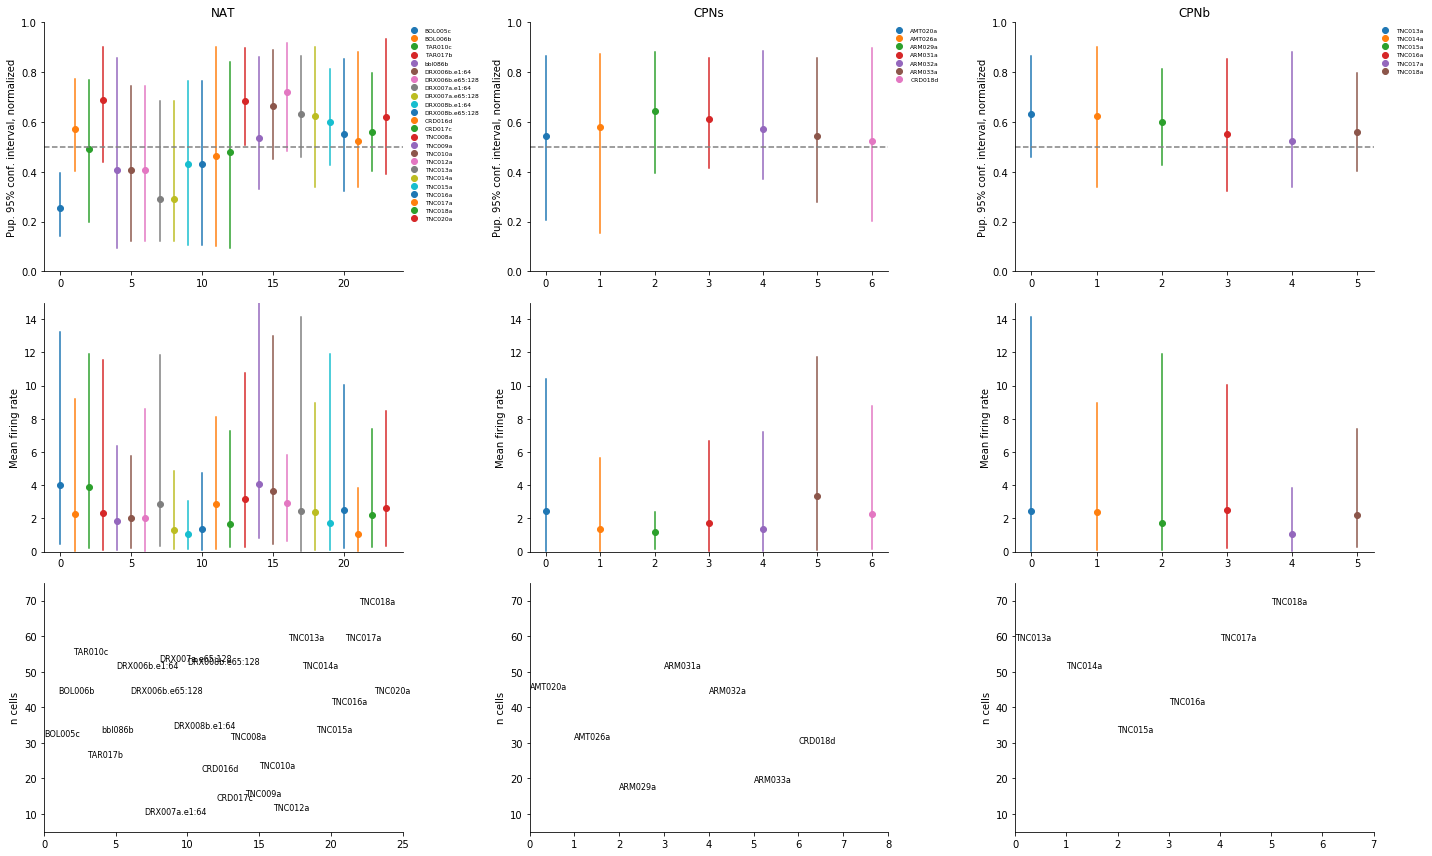

In [4]:
# COMPARE PUPIL VARIANCE, MEAN FIRING RATES, NUMBER OF CELLS
f, ax = plt.subplots(3, 3, figsize=(20, 12))

for i, (sites, dataset) in enumerate(zip([nat_data, cpns_data, cpnb_data], ['NAT', 'CPNs', 'CPNb'])):
#for i, (sites, dataset) in enumerate(zip([nat_data], ['NAT'])):
    for j, s in enumerate(sites):
        # pupil
        p = rdata[s][2][:, :, :, ~rdata[s][1][0, 0, 0, :]].squeeze() # X_pup, keep evoked data
        p /= p.max() #rdata[s][-1] #p.max()
        ax[0, i].plot(j, p.mean(), 'o', label=s)
        ax[0, i].plot([j, j], [np.quantile(p, 0.025), np.quantile(p, 0.975)], color=ax[0, i].get_lines()[-1].get_color())
        # firing rate
        r = rdata[s][0][:, :, :, ~rdata[s][1][0, 0, 0, :]].squeeze()
        ur = r.mean(axis=(1,2,3))
        ax[1, i].plot(j, ur.mean(), 'o', label=s)
        ax[1, i].plot([j, j], [np.quantile(ur, 0.025), np.quantile(ur, 0.975)], color=ax[1, i].get_lines()[-1].get_color())

        #ax[2, i].plot(j, len(ur), 'o')
        ax[2, i].text(j, len(ur), s, fontsize=8)
    
    ax[0, i].legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False, fontsize=6)
    ax[0, i].set_ylim((0, 1))
    ax[0, i].axhline(0.5, linestyle='--', color='grey')
    ax[0, i].set_title(dataset)
    ax[0, i].set_ylabel("Pup. 95% conf. interval, normalized")

    ax[1, i].set_ylabel("Mean firing rate")
    ax[1, i].set_ylim((0, 15))
    
    ax[2, i].set_ylabel("n cells")
    ax[2, i].set_ylim((5, 75))
    ax[2, i].set_xlim((0, len(sites)+1))

f.tight_layout()

[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL006b/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/TAR010c/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/TAR017b/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/bbl086b/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/DRX006b.e1:64/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/DRX006b.e65:128/dprime_jk10_

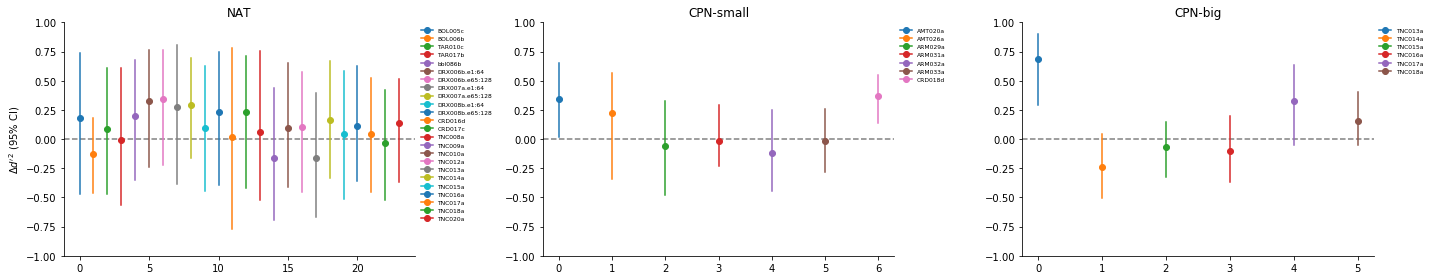

In [6]:
# DECODING EFFECTS PER SITE
f, ax = plt.subplots(1, 3, figsize=(20, 4))

loader = decoding.DecodingResults()
modelname = 'dprime_jk10_zscore_allPup_fixtdr2-fa'
n_components = 2

for i, (dataset, batch, sites) in enumerate(zip(['NAT', 'CPN-small', 'CPN-big'], [322, 331, 331], [nat_data, cpns_data, cpnb_data])):
    for j, site in enumerate(sites):
        if site in ['BOL005c', 'BOL006b']:
            _batch = 294
        else:
            _batch = batch
        
        if batch == 331:
            _modelname = modelname.replace("_allPup", "")
        else:
            _modelname = modelname
        
        fn = os.path.join(DPRIME_DIR, str(_batch), site, _modelname+'_TDR.pickle')
        results = loader.load_results(fn)
        df = results.numeric_results; df['delta_dprime'] = (df['bp_dp'] - df['sp_dp']) / (df['bp_dp'] + df['sp_dp']); df['site'] = site; df['batch'] = batch
        ax[i].plot(j, df['delta_dprime'].mean(), marker='o', label=site)
        ax[i].plot([j, j], 
                    [np.quantile(df['delta_dprime'], 0.025), np.quantile(df['delta_dprime'], 0.975)],
                     color=ax[i].get_lines()[-1].get_color())
    ax[i].legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False, fontsize=6)
    ax[i].axhline(0, linestyle='--', color='grey', zorder=-1)
    ax[0].set_ylabel(r"$\Delta d'^2$ (95% CI)")
    ax[i].set_ylim((-1, 1))
    ax[i].set_title(dataset)

f.tight_layout()

In [7]:
# CHANGE IN NOISE CORRELATIONS (mvm mask results not yet run for older data)
rsc = ld.load_noise_correlation('rsc_ev_perstim', batch=[294, 322, 331])
rsc['delta'] = rsc['sp'] - rsc['bp']


no results found for site: AMT021b, model: rsc_ev_perstim
no results found for site: ARM005e, model: rsc_ev_perstim
no results found for site: CRD005b, model: rsc_ev_perstim
no results found for site: CRD019b, model: rsc_ev_perstim


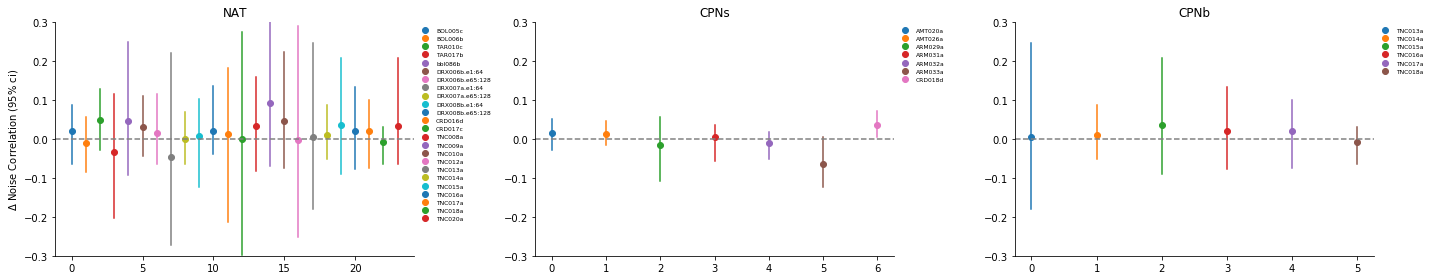

In [8]:
f, ax = plt.subplots(1, 3, figsize=(20, 4))

for i, (sites, dataset) in enumerate(zip([nat_data, cpns_data, cpnb_data], ['NAT', 'CPNs', 'CPNb'])):
    for j, s in enumerate(sites):
        d = rsc[rsc.site==s]
        delta = d.groupby(by='stim').mean()['delta']
        delta = delta[~np.isnan(delta)]
        ax[i].plot(j, delta.mean(), 'o', label=s)
        ax[i].plot([j, j], [np.quantile(delta, 0.025), np.quantile(delta, 0.975)], color=ax[i].get_lines()[-1].get_color())
    
    ax[i].legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False, fontsize=6)
    ax[i].set_ylim((-.3, .3))
    ax[i].axhline(0.0, linestyle='--', color='grey')
    ax[i].set_title(dataset)
    ax[0].set_ylabel(r"$\Delta$ Noise Correlation (95% ci)")

f.tight_layout()

In [9]:
# COMPARE LV MODEL DECODING RESULTS W/ RAW RESULTS
decoder = 'dprime_jk10_zscore_allPup_fixtdr2-fa'
rlv = 'psth.fs4.pup-ld-st.pup0.pvp-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3'
ind = 'psth.fs4.pup-ld-st.pup0.pvp-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.SxR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3'
plv = 'psth.fs4.pup-ld-st.pup.pvp0-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.SxR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3'
plv2 = 'psth.fs4.pup-ld-st.pup.pvp-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.SxR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3'

#rlv = "psth.fs4.pup-ld-st.pup-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.1xR.so-inoise.1xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3"
#ind = "psth.fs4.pup-ld-st.pup-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.1xR.so-inoise.SxR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3"
#plv = "psth.fs4.pup-ld-st.pup-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.SxR.so-inoise.SxR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3"
#plv2 = "psth.fs4.pup-ld-st.pup.pvp-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.2xR-spred-lvnorm.SxR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3"

recache = False
results = {}
for i, (dataset, batch, sites) in enumerate(zip(['NAT', 'sCPN', 'bCPN'], [322, 331, 331], [nat_data, cpns_data, cpnb_data])):
    if batch != 331:
        _rlv = rlv.replace('-epcpn', '')
        _ind = ind.replace('-epcpn', '')
        _plv = plv.replace('-epcpn', '')
        _plv2 = plv2.replace('-epcpn', '')
        _decoder = decoder
    else:
        _rlv = rlv
        _ind = ind
        _plv = plv
        _plv2 = plv2
        _decoder = decoder.replace('_allPup', '')
    
    results[dataset] = {
        'fit': {
            'pup_indep': [],
            'indep_noise': [],
            'lv': [],
            'lv2': [],
            'raw': []
        },
        'val': {
            'pup_indep': [],
            'indep_noise': [],
            'lv': [],
            'lv2': [],
            'raw': []
        }
    }
    for j, site in enumerate(sites):
        if site in ['BOL005c', 'BOL006b']:
            _batch = 294
        else:
            _batch = batch
        loader = decoding.DecodingResults()
        fn = os.path.join(DPRIME_DIR, str(_batch), site, _decoder+'_TDR.pickle')
        raw = loader.load_results(fn, cache_path=None, recache=recache)
        fn = os.path.join(DPRIME_DIR, str(_batch), site, _decoder+f'_model-LV-{_rlv}_TDR.pickle')
        lv0 = loader.load_results(fn, cache_path=None, recache=recache)
        fn = os.path.join(DPRIME_DIR, str(_batch), site, _decoder+f'_model-LV-{_ind}_TDR.pickle')
        indep = loader.load_results(fn, cache_path=None, recache=recache)
        fn = os.path.join(DPRIME_DIR, str(_batch), site, _decoder+f'_model-LV-{_plv}_TDR.pickle')
        lv = loader.load_results(fn, cache_path=None, recache=recache)
        fn = os.path.join(DPRIME_DIR, str(_batch), site, _decoder+f'_model-LV-{_plv2}_TDR.pickle')
        lv2 = loader.load_results(fn, cache_path=None, recache=recache)

        # get the epochs of interest (fit epochs)
        mask_bins = lv.meta['mask_bins']
        fit_combos = [k for k, v in lv.mapping.items() if (('_'.join(v[0].split('_')[:-1]), int(v[0].split('_')[-1])) in mask_bins) & \
                                                            (('_'.join(v[1].split('_')[:-1]), int(v[1].split('_')[-1])) in mask_bins)]
        all_combos = lv.evoked_stimulus_pairs
        val_combos = [c for c in all_combos if c not in fit_combos]

        for k, res in zip(['pup_indep', 'indep_noise', 'lv', 'lv2', 'raw'], [lv0, indep, lv, lv2, raw]):
            df = res.numeric_results
            df['delta'] = (df['bp_dp'] - df['sp_dp']) / (df['bp_dp'] + df['sp_dp']) #(raw.numeric_results['bp_dp'] + raw.numeric_results['sp_dp'])
            df['raw_delta'] = (df['bp_dp'] - df['sp_dp'])
            df['site'] = site
            results[dataset]['fit'][k].append(df.loc[fit_combos])
            results[dataset]['val'][k].append(df.loc[val_combos])

    # concatenate data frames
    for k in results[dataset]['fit'].keys():
        results[dataset]['fit'][k] = pd.concat(results[dataset]['fit'][k])
        results[dataset]['val'][k] = pd.concat(results[dataset]['val'][k])



[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup0.pvp-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup0.pvp-hrc-psthfr.z-plgsm.er5-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.SxR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup.pvp0-hrc-psthfr.z-plgsm.er5-aev_stategain.S

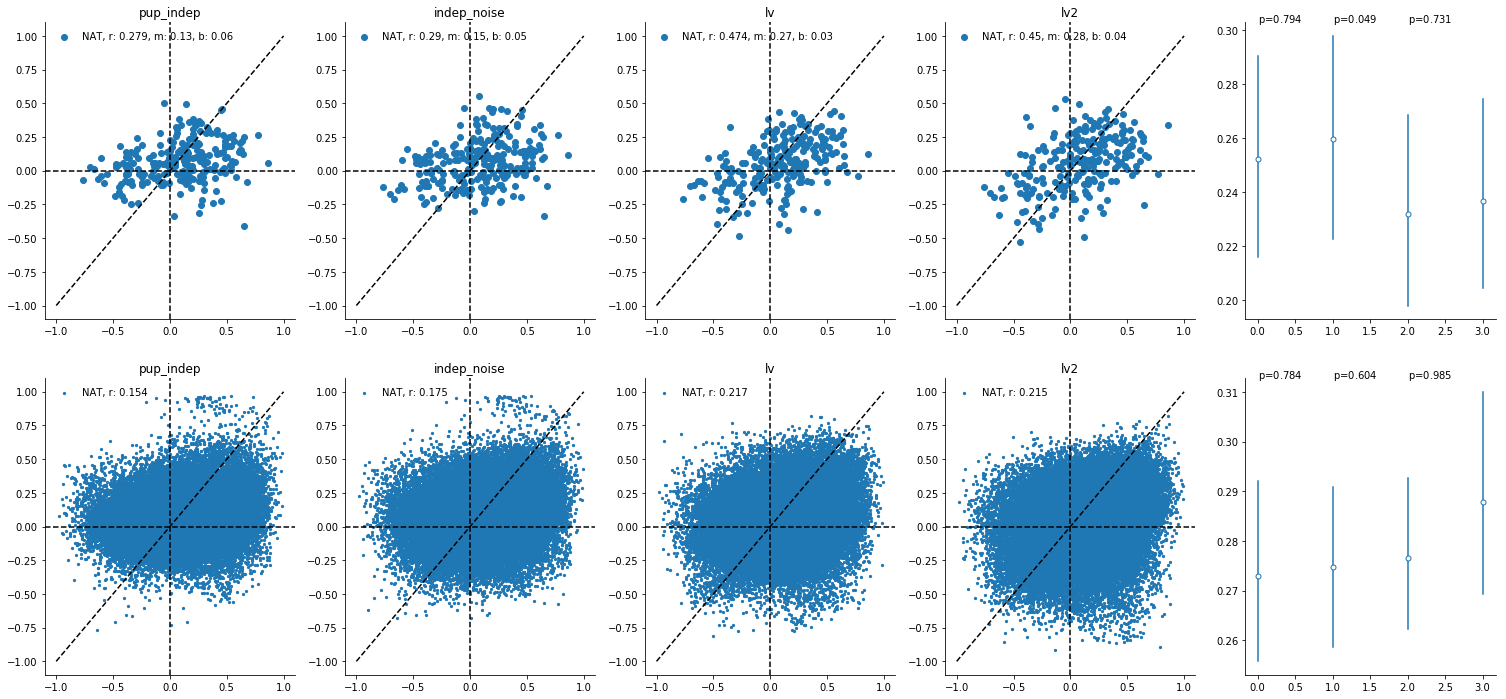

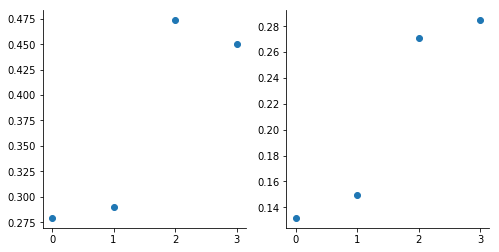

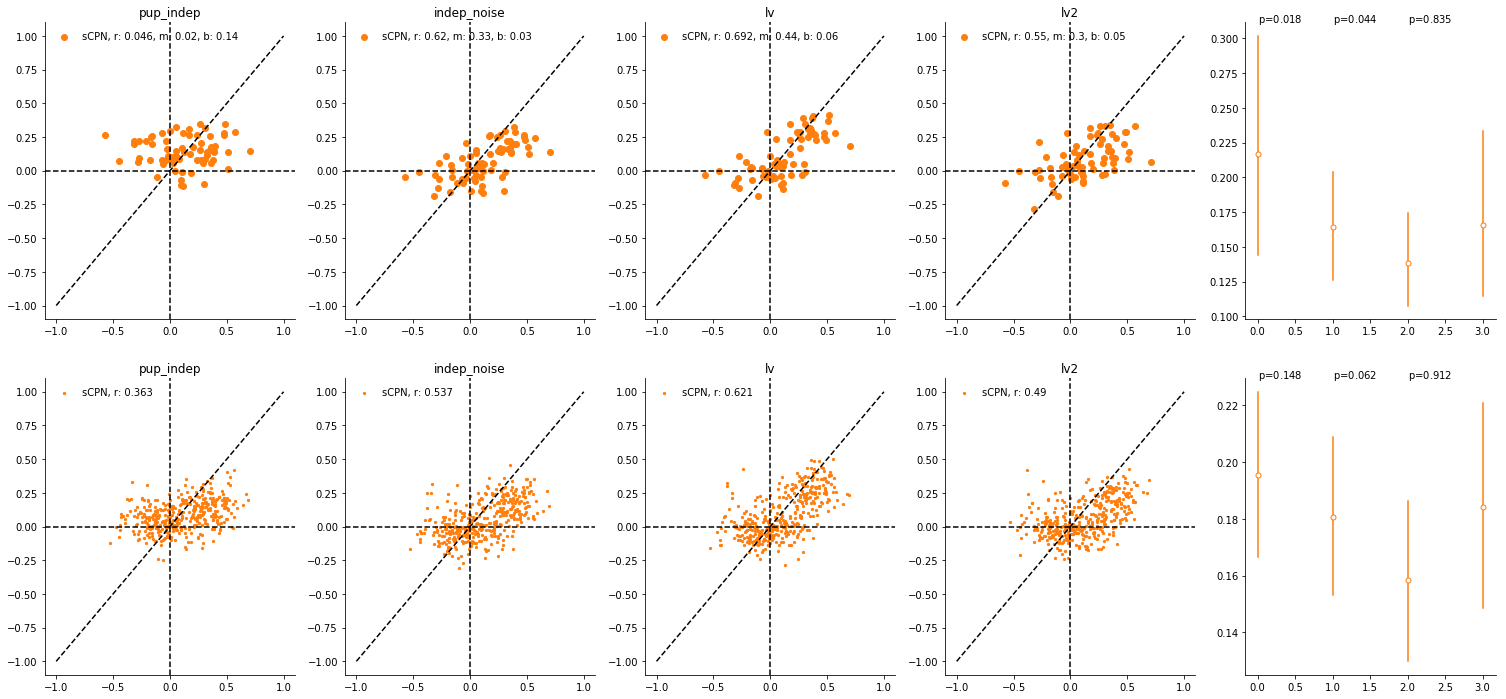

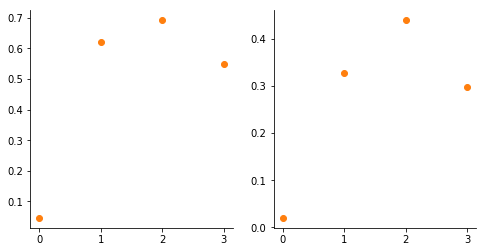

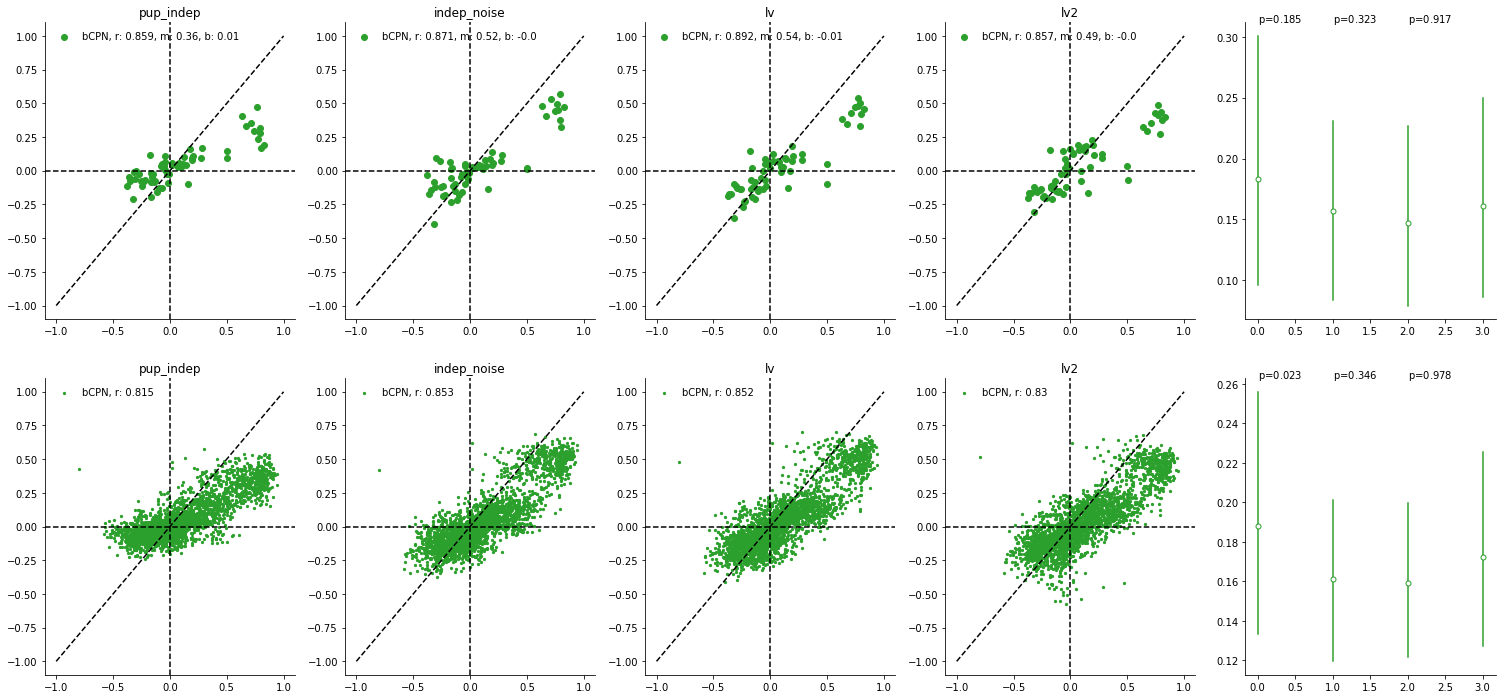

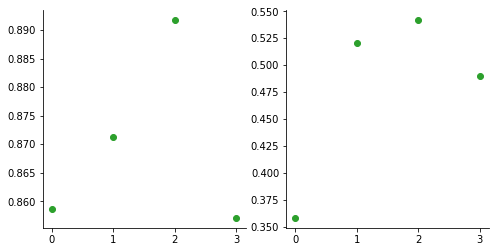

In [10]:
# PLOT FIT/VAL RESULTS COMPARISONS
np.random.seed(123)
metric = 'delta'

for j, (col, dataset) in enumerate(zip(['tab:blue', 'tab:orange', 'tab:green'], results.keys())):
    f, ax = plt.subplots(2, 5, figsize=(26, 12))
    f2, ax2 = plt.subplots(1, 2, figsize=(8, 4))
    err = {}
    err_val = {}
    for i, mn in enumerate(results[dataset]['fit'].keys()):
        if mn!='raw':
            x = results[dataset]['fit']['raw'][metric]
            y = results[dataset]['fit'][mn][metric]
            m, b = np.polyfit(x, y, 1)
            lab = f"{dataset}, r: {round(np.corrcoef(x, y)[0, 1], 3)}, m: {round(m, 2)}, b: {round(b, 2)}"
            ax[0, i].scatter(x, y, label=lab, color=col)
            ax[0, i].set_title(mn)
            if 1: #j == 0:
                ax[0, i].plot([-1, 1], [-1, 1], 'k--')
                ax[0, i].axhline(0, linestyle='--', color='k'); ax[0, i].axvline(0, linestyle='--', color='k') 
            if 1: #j == 0:
                ax[0, i].legend(frameon=False, fontsize=10) 

            r = results[dataset]["fit"]["raw"]
            pr = results[dataset]["fit"][mn]
            d = {s: np.abs(r[r.site==s][metric]-pr[pr.site==s][metric]).values for s in r.site.unique()}
            err[mn] = d
            bootsamp = get_bootstrapped_sample(d, metric='mean', even_sample=False, nboot=1000)
            low = np.quantile(bootsamp, .025)
            high = np.quantile(bootsamp, .975)

            ax[0, 4].scatter(i, np.mean(bootsamp), color='white', edgecolor=col, s=25)
            ax[0, 4].plot([i, i], [low, high], zorder=-1, color=col)
            ax2[0].plot(i, np.corrcoef(x, y)[0, 1], marker='o', color=col)
            ax2[1].plot(i, m, marker='o', color=col)

            x = results[dataset]['val']['raw'][metric]
            y = results[dataset]['val'][mn][metric]
            lab = f"{dataset}, r: {round(np.corrcoef(x, y)[0, 1], 3)}"
            ax[1, i].scatter(x, y, label=lab, s=5, color=col)
            ax[1, i].set_title(mn)
            if 1: #j == 0:
                ax[1, i].plot([-1, 1], [-1, 1], 'k--')
                ax[1, i].axhline(0, linestyle='--', color='k'); ax[1, i].axvline(0, linestyle='--', color='k') 
            if 1: #j == 0:
                ax[1, i].legend(frameon=False, fontsize=10) 

            r = results[dataset]["val"]["raw"]
            pr = results[dataset]["val"][mn]
            d = {s: np.abs(r[r.site==s][metric]-pr[pr.site==s][metric]).values for s in r.site.unique()}
            err_val[mn] = d
            bootsamp = get_bootstrapped_sample(d, metric='mean', even_sample=False, nboot=1000)
            low = np.quantile(bootsamp, .025)
            high = np.quantile(bootsamp, .975)

            ax[1, 4].scatter(i, np.mean(bootsamp), color='white', edgecolor=col, s=25)
            ax[1, 4].plot([i, i], [low, high], zorder=-1, color=col)
    for i, pair in enumerate([['pup_indep', 'indep_noise'], ['indep_noise', 'lv'], ['lv', 'lv2']]):
        d = {s: err[pair[0]][s]-err[pair[1]][s] for s in err[pair[1]].keys()}
        bootsamp = get_bootstrapped_sample(d, metric='mean', even_sample=False, nboot=1000)
        p = get_direct_prob(bootsamp, np.zeros(len(bootsamp)))[0]
        ax[0, 4].text(i, ax[0, 4].get_ylim()[-1], r"p=$%s$"%round(p, 3), fontsize=10)

        d = {s: err_val[pair[0]][s]-err_val[pair[1]][s] for s in err_val[pair[1]].keys()}
        bootsamp = get_bootstrapped_sample(d, metric='mean', even_sample=False, nboot=1000)
        p = get_direct_prob(bootsamp, np.zeros(len(bootsamp)))[0]
        ax[1, 4].text(i, ax[1, 4].get_ylim()[-1], r"p=$%s$"%round(p, 3), fontsize=10)
    